### Importing library

In [ ]:
from keras import layers, Model
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### y = 5x^3-8x^2-7x+1

In [ ]:
def y_value_calc(x):
  return 5 * x**3 - 8 * x**2 - 7 * x + 1

### Creating Dataset

In [ ]:
def value_generate(data):
  x = np.random.randint(-20, 20, data, dtype=int)
  y = y_value_calc(x);
  return x, y

### Building the Model

In [ ]:
def dnn_model():
  inputs = layers.Input(shape=(1))
  hidden_layer_1 = layers.Dense(32, activation='relu')(inputs)
  hidden_layer_2 = layers.Dense(64, activation='relu')(hidden_layer_1)
  hidden_layer_3 = layers.Dense(128, activation='relu')(hidden_layer_2)
  outputs = layers.Dense(1)(hidden_layer_3)

  model = Model(inputs = inputs, outputs = outputs)
  return model

### Creating training, validation and test split

In [ ]:
x_data, y_data = value_generate(10000)
# Performing Normalization
x_data,y_data = x_data/max(x_data), y_data/max(y_data)

data_length = len(x_data)
# Train
x_train, y_train = x_data[:int(data_length*0.9)], y_data[:int(data_length*0.9)]
#Validation
x_validation, y_validation = x_data[int(data_length*0.90):int(data_length*0.95)], y_data[int(data_length*0.90):int(data_length*0.95)]
# Test
x_test, y_test = x_data[int(data_length*.95):], y_data[int(data_length*0.95):]


### Model Train

In [ ]:
model = dnn_model()
model.summary()
# Compile the model and train
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='mse',metrics=['accuracy'])
fitted_model = model.fit(x_train, y_train, epochs=50, validation_data=(x_validation, y_validation))

history = fitted_model.history


Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_115 (Dense)           (None, 32)                64        
                                                                 
 dense_116 (Dense)           (None, 64)                2112      
                                                                 
 dense_117 (Dense)           (None, 128)               8320      
                                                                 
 dense_118 (Dense)           (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
282/282 [==

In [ ]:
history

{'loss': [0.021757183596491814,
  0.0001823286002036184,
  3.497100988170132e-05,
  1.6020147086237557e-05,
  9.873869203147478e-06,
  9.69244592852192e-06,
  1.0604085218801629e-05,
  1.7609267160878517e-05,
  2.1909843781031668e-05,
  7.43083146517165e-05,
  5.955295819148887e-06,
  3.955663487431593e-05,
  1.7930371541297063e-05,
  2.27042255573906e-06,
  1.5974706911947578e-05,
  7.155674393288791e-05,
  1.2547979167720769e-05,
  3.4564509405754507e-05,
  4.355792498245137e-06,
  2.921633677033242e-05,
  3.350135375512764e-05,
  3.09081627847263e-07,
  5.622989078801766e-07,
  0.0001226975437020883,
  9.754146049090195e-06,
  3.711872977874009e-06,
  7.237389581860043e-06,
  4.2207539081573486e-05,
  4.304823050915729e-06,
  4.420237473823363e-06,
  4.003070353064686e-05,
  8.85866211319808e-06,
  1.1744923256173934e-07,
  0.00016128008428495377,
  2.6770301246870076e-06,
  4.556601709282404e-07,
  5.424602136372414e-07,
  1.0255449524265714e-05,
  2.5607983843656257e-05,
  4.02469

16/16 [==============================] - 0s 1ms/step - loss: 3.6988e-06 - accuracy: 0.0260
Test Loss: 3.698776936289505e-06
Test Accuracy: 0.026000000536441803
16/16 [==============================] - 0s 980us/step


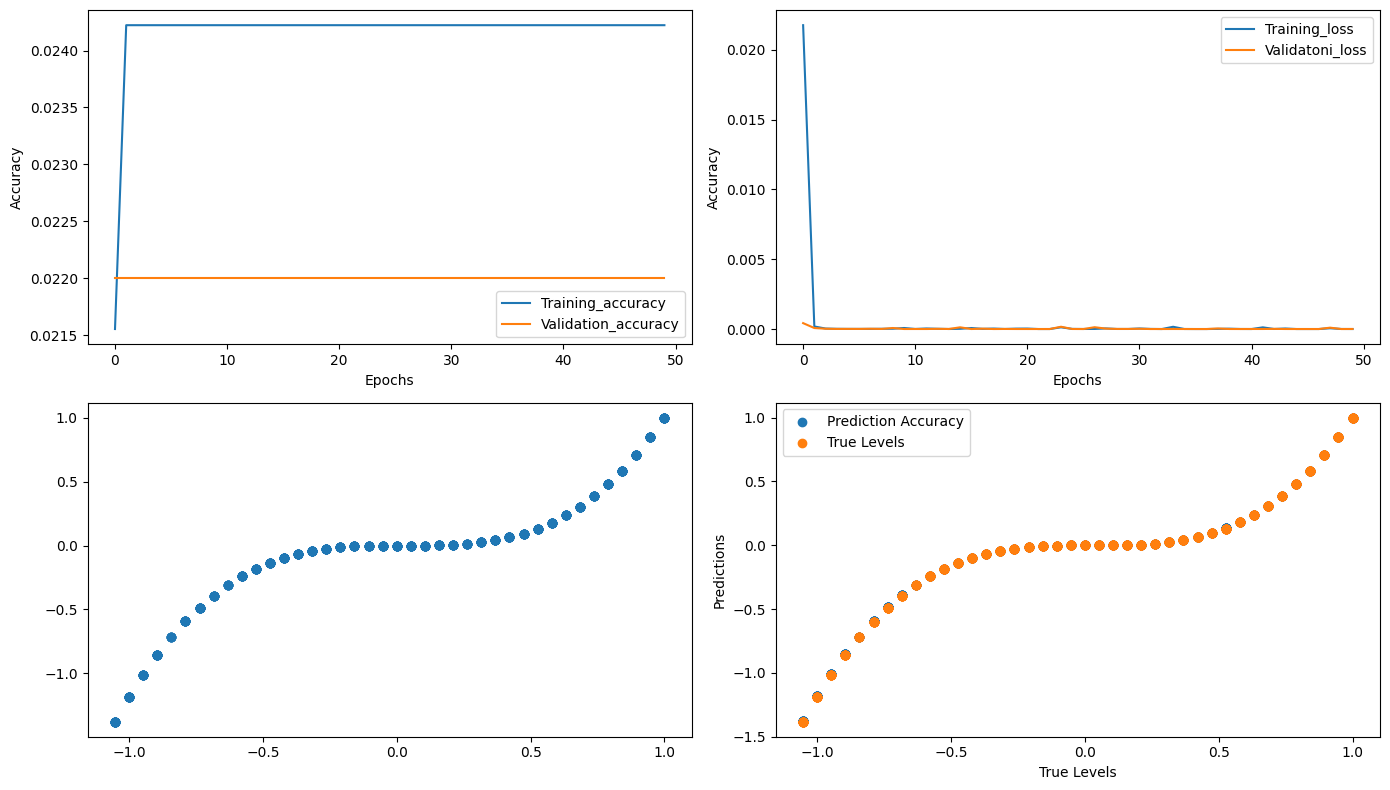

In [ ]:
plt.figure(figsize=(14,8))

# Plot Training and Validation Accuracy
plt.subplot(2,2,1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_accuracy', 'Validation_accuracy'])

# Plot Training and Validation Loss
plt.subplot(2,2,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_loss', 'Validatoni_loss'])

plt.subplot(2,2,3)
plt.scatter(x_test,y_test)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict on test data
predictions = model.predict(x_test)

# Plot prediction accuracy vs true levels
plt.subplot(2,2,4)
plt.scatter(x_test,y_test)
plt.scatter(x_test, predictions)
plt.ylabel('Predictions')
plt.xlabel('True Levels')
plt.legend(['Prediction Accuracy', 'True Levels'])


plt.tight_layout()
plt.show()